# An analysis on Arteta's tenure at Arsenal (2023 Update)

# 1.Introduction

The English Premier League is one of the biggest football leagues and is known throughout the world. With twenty English clubs contesting for the coveted Premier League trophy every season, the league produces many famous football teams with huge fanbases present in every corner of the world which is rapidly increasing. One football club in particular which has a great history in the league but has struggled in recent times and is in the process of rebuilding is Arsenal Football Club. Ever since the departure of long time coach, Arsene Wenger in 2018, Arsenal have underperformed and has gone through 2 changes in the managerial postion. Currently in his third full season with Arsenal, Mikel Arteta is doing a commendable job thus far in guiding the club back to its former glory, finishing 5th in the league in the latest season(21/22 season at the time of writing) just one place away from securing a spot in the prestigious Champions League Competition. As such, I would like to explore how well has Mikel Arteta fared so far as the manager of Arsenal.


# 2 Aims and objectives

As mentioned above, my aims and objectives for this project are:
- Finding out if there were any improvements to the team over the three seasons Arteta has been in charge
- How similar are Arteta and Jurgen Klopp in their first three seasons at their respective clubs
- Areas where Arsenal can improve
- What we can expect from Arsenal for the upcoming season

In [1]:
# Import libraries and modules
from bs4 import *
import urllib3
import pandas as pd
import requests
from scrape_helper import *
import matplotlib.pyplot as plt
import numpy as np

# 3 Data
## 3.1 Data Requirements
For this project, I need the statistics of the club over the past three seasons as it is the period that Mikel Arteta has been in charge of the club. The data must be reliable and does not breach data policy of websites.

To measure the progress of Arteta, I have decided to use Liverpool's manager Jurgen Klopp's first three seasons at Liverpool as a comparison to measure how well Arteta has performed.
## 3.2 Choice of data
For reliable data, I have chosen to retrieve the statistics from wikipedia. 
Since I am only interested in the tenure of Mikel Arteta, the statistics only contain the statistics of Arsenal in his three seasons in charge and the statistics of Liverpool will only contain statistics of Jurgen Klopp's first three seasons in charge of Liverpool
## 3.3 Limitations and constraints of data
### 3.3.1 Time periods covered by the statistics and data size
If the statistics could contain more than three seasons, it would yield a more meaningful and accurate reflection of Arteta's progress with Arsenal. However, since he only had three seasons under his belt, there is no possible way for me attain more than three seasons. Given time, I would like to have compare the team with many other clubs.
### 3.3.2 Difference in time periods covered by the statistics
Arteta only came in charge of Arsenal in 2019, whereas Jurgen Klopp took helm of Liverpool in 2015. As such, the first three seasons of both managers will be of different time periods.

The competitiveness of the league through the different seasons may have been different in contributing to the performance of the clubs therefore, it may not be a fair comparison.




# 4 Ethical Considerations
### 4.1 Use of statistics
Wikipedia does not forbid the use of webscraping. It mentions in its disclaimer that the information provided here is provided freely and that I am granted a limited license to copy anything from their site.[1] 
### 4.2 Onward use of my analysis and data
Any entity who would want to use my data would be able to do so freely because wikipedia does not forbid the useage of their data.

The assumptions and analysis are soley of my own and does not reflect the assumptions of others

### 4.3 Potential outcomes of using my project for analysis
Since the data that I have used are as of the latest season which had just ended (21/22 season at the time of working on this project), someone from the future would have been able to access data from their present thus, not reflecting an accurate depiction of the analysis for their situation.

## 5 Webscraping Statistics
### 5.1 Webscraping Arsenal Statistics from Wikipedia
The function below extracts statistics of Arsenal from the table in Wikipedia

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_Arsenal_F.C._seasons"
http = urllib3.PoolManager()
response = http.request('GET', url)
page = BeautifulSoup(response.data, "lxml")

# Extract table
table = page.find('table', {'class': 'wikitable sortable'})
df = tableToDataFrame(table)
mydf=df.tail(4)


### 5.2 Webscraping Liverpool Statistics from Wikipedia
The function below extracts statistics of Liverpool from the table in Wikipedia

In [3]:
url2 = "https://en.wikipedia.org/wiki/List_of_Liverpool_F.C._seasons"
http2 = urllib3.PoolManager()
response2 = requests.get(url2)
page2 = BeautifulSoup(response2.text, "html.parser")

# Extract table
table2 = page2.find('table', {'class': 'wikitable plainrowheaders sortable'})

df2 = pd.read_html(str(table2))
df2 = pd.DataFrame(df2[0])
mydf2 = df2[116:120]

## 6 Data Cleaning and processing
The following function will clean the data obtained from scraping by removing characters such as ♦ and alphabets in numbers such as 1st by removing the 'st'. 

In [4]:
#The function for cleaning the data
def stripChar(text):
    f = text.find("th")
    g = text.find("nd")
    h = text.find("♦")
    i = text.find("st")
    if f>=0:
        text = text[:f]
    if g>=0:
        text = text[:g]
    if h>=0:
        text = text[:h]
    if i>0:
        text = text[:i]
    return text
# Applying the function on the data
mydf = mydf.applymap(stripChar)
mydf2 = mydf2.applymap(stripChar)
# Cleaning the columns of mydf2
mydf2.columns = ("Season", "Division", "Pld", "W", "D", "L", "GF", "GA", "Pts", "Pos", "FA Cup", "League Cup", "Comm. Shield", "UCL", "UEL", "CWC", "Super Cup", "Club World Cup", "Player(s)", "Goals")

### 6.1 Check the cleaned and processed data

In [5]:
mydf

,Index,Season,Division,Pld,W,D,L,GF,GA,Pts,Pos,FA Cup,League,Community,Competition,Result,Player(s),Goals
126,,2019–20,Prem,38,14,14,10,56,48,56,8,W,R4,—,Europa League,R32,Pierre-Emerick Aubameyang,29
127,,2020–21,Prem,38,18,7,13,55,39,61,8,R4,QF,W,Europa League,SF,Alexa,17
128,,2021–22,Prem,38,22,3,13,61,48,69,5,R3,SF,—,—,—,Bukayo Saka,12
129,,2022–23,Prem,38,26,6,6,88,43,84,2,R4,R3,—,Europa League,R16,Gabriel MartinelliMartin ØdegaardBukayo Saka,15


In [6]:
mydf2

,Season,Division,Pld,W,D,L,GF,GA,Pts,Pos,FA Cup,League Cup,Comm. Shield,UCL,UEL,CWC,Super Cup,Club World Cup,Player(s),Goals
116,2016–17,PL,38,22,10,6,78,42,76,4,R4,SF,—,—,—,—,—,—,Philippe Coutinho,14
117,2017–18,PL,38,21,12,5,84,38,75,4,R4,R3,—,RU,—,—,—,—,Mohamed Salah[p],44
118,2018–19,PL,38,30,7,1,89,22,97,2,R3,R3,—,W,—,—,—,—,Mohamed Salah[q],27
119,2019–20,PL,38,32,3,3,85,33,99,1,R5,QF,RU,R16,—,—,W,W,Mohamed Salah,23


## 7 Saving the processed data to CSV files
The function below will save the processed data to CSV files 

In [7]:
mydf.to_csv('Arsenal4SeasonStats.csv', index=False)
mydf2.to_csv('Liverpool4SeasonStats.csv', index=False)

## 8 Reading the csv files

In [8]:
mydata = pd.read_csv("Arsenal4SeasonStats.csv")
mydata2 = pd.read_csv("Liverpool4SeasonStats.csv")

## 9 Preparing the data for analysis
First we have to check if the data is appropriate for use of analysis
### 9.1 Check what are the data types


In [9]:
mydata.dtypes

Index          float64
Season          object
Division        object
Pld              int64
W                int64
D                int64
L                int64
GF               int64
GA               int64
Pts              int64
Pos              int64
FA Cup          object
League          object
Community       object
Competition     object
Result          object
Player(s)       object
Goals            int64
dtype: object

In [10]:
mydata2.dtypes

Season            object
Division          object
Pld                int64
W                  int64
D                  int64
L                  int64
GF                 int64
GA                 int64
Pts                int64
Pos                int64
FA Cup            object
League Cup        object
Comm. Shield      object
UCL               object
UEL               object
CWC               object
Super Cup         object
Club World Cup    object
Player(s)         object
Goals              int64
dtype: object

### 9.2 Convert the data to relevant datatypes for use

In [11]:
mydata.convert_dtypes()

,Index,Season,Division,Pld,W,D,L,GF,GA,Pts,Pos,FA Cup,League,Community,Competition,Result,Player(s),Goals
0,<NA>,2019–20,Prem,38,14,14,10,56,48,56,8,W,R4,—,Europa League,R32,Pierre-Emerick Aubameyang,29
1,<NA>,2020–21,Prem,38,18,7,13,55,39,61,8,R4,QF,W,Europa League,SF,Alexa,17
2,<NA>,2021–22,Prem,38,22,3,13,61,48,69,5,R3,SF,—,—,—,Bukayo Saka,12
3,<NA>,2022–23,Prem,38,26,6,6,88,43,84,2,R4,R3,—,Europa League,R16,Gabriel MartinelliMartin ØdegaardBukayo Saka,15


In [12]:
mydata2.convert_dtypes()

,Season,Division,Pld,W,D,L,GF,GA,Pts,Pos,FA Cup,League Cup,Comm. Shield,UCL,UEL,CWC,Super Cup,Club World Cup,Player(s),Goals
0,2016–17,PL,38,22,10,6,78,42,76,4,R4,SF,—,—,—,—,—,—,Philippe Coutinho,14
1,2017–18,PL,38,21,12,5,84,38,75,4,R4,R3,—,RU,—,—,—,—,Mohamed Salah[p],44
2,2018–19,PL,38,30,7,1,89,22,97,2,R3,R3,—,W,—,—,—,—,Mohamed Salah[q],27
3,2019–20,PL,38,32,3,3,85,33,99,1,R5,QF,RU,R16,—,—,W,W,Mohamed Salah,23


Now, mydata displays the different types of data types it has been converted into

In [13]:
mydata.dtypes

Index          float64
Season          object
Division        object
Pld              int64
W                int64
D                int64
L                int64
GF               int64
GA               int64
Pts              int64
Pos              int64
FA Cup          object
League          object
Community       object
Competition     object
Result          object
Player(s)       object
Goals            int64
dtype: object

In [14]:
mydata2.dtypes

Season            object
Division          object
Pld                int64
W                  int64
D                  int64
L                  int64
GF                 int64
GA                 int64
Pts                int64
Pos                int64
FA Cup            object
League Cup        object
Comm. Shield      object
UCL               object
UEL               object
CWC               object
Super Cup         object
Club World Cup    object
Player(s)         object
Goals              int64
dtype: object

## 10 Analysis on Arsenal
###  10.1 Plotting data on the statistics

In [15]:
mydata

,Index,Season,Division,Pld,W,D,L,GF,GA,Pts,Pos,FA Cup,League,Community,Competition,Result,Player(s),Goals
0,NaN,2019–20,Prem,38,14,14,10,56,48,56,8,W,R4,—,Europa League,R32,Pierre-Emerick Aubameyang,29
1,NaN,2020–21,Prem,38,18,7,13,55,39,61,8,R4,QF,W,Europa League,SF,Alexa,17
2,NaN,2021–22,Prem,38,22,3,13,61,48,69,5,R3,SF,—,—,—,Bukayo Saka,12
3,NaN,2022–23,Prem,38,26,6,6,88,43,84,2,R4,R3,—,Europa League,R16,Gabriel MartinelliMartin ØdegaardBukayo Saka,15


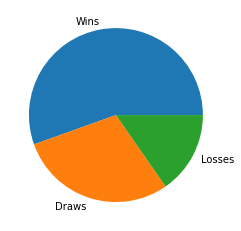

In [16]:
TotalW = mydata["Pld"].sum()
TotalD = mydata["W"].sum()
TotalL = mydata["L"].sum()

y =np.array([TotalW, TotalD, TotalL])
mylabel = ["Wins","Draws","Losses"]

plt.pie(y, labels = mylabel)
plt.show()

Seen in the pie chart above, Arteta has a large portion of Wins as compare to draws and losses. However, the concerning part is that the draws and losses seem to be similar in size.

#### 10.1.2 Graph of points earned over the past 4 seasons

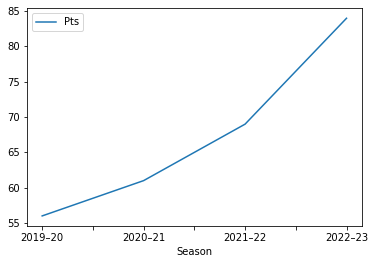

In [17]:
mydata.plot(x = 'Season', y = 'Pts')
plt.show()

The steady increase of points through the three seasons is a positive sight as it means that the team is improving and is winning more games. I can expect an increase in points for the next season

#### 10.1.3 Graph of goals scored over the past 4 seasons


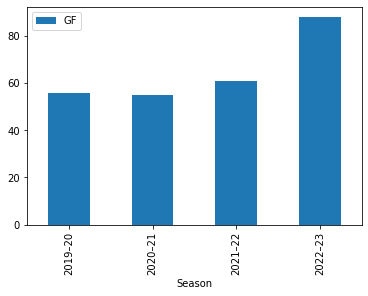

In [18]:
mydata.plot(kind = 'bar', x = 'Season', y = 'GF')
plt.show()

In [19]:
diff=mydata['GF'][3]-mydata['GF'][2]
pct = (diff/mydata['GF'][3]) * 100

From the graph above, we can see a huge increase of {{pct}} % of goals scored when compared from the previous season

#### 10.1.4 Graph of goals conceded over the past 4 seasons

<AxesSubplot:xlabel='Season'>

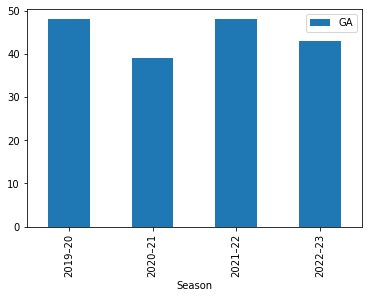

In [20]:
mydata.plot(kind = 'bar', x = 'Season', y = 'GA')

The number of goals conceded is really concerning as it does not decrease but it increases in the latest season when compared with 20/21 season. This is concerning because it shows the defence is not as efficient in keeping goals out.

#### 10.1.5 League position over the past 4 seasons

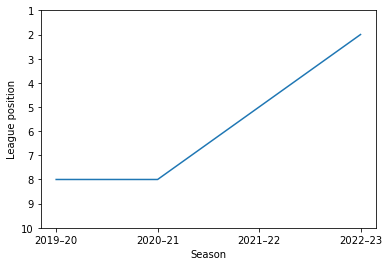

In [21]:
plt.plot('Season','Pos',data = mydata)
plt.ylim(10,1)
plt.ylabel('League position')
plt.xlabel('Season')
plt.show()

It is refreshing to see that after stagnating in 8th position for two seasons in a row, the Arsenal were able to finish 5th in the latest season. An improvement of 3 positions.

## 11 Comparing Arsenal with Liverpool
Now we will compare the statistics of Liverpool's Jurgen Klopp first three seasons at liverpool with Arsenal's Arteta to see how similiar or different both were when they started out
### 11.1 Plot a graph to compare league positions of both clubs in first 3 seasons under their said managers
The graph below will show how the teams fared in the league in terms of league position at the end of the first three seasons in charge of their new managers

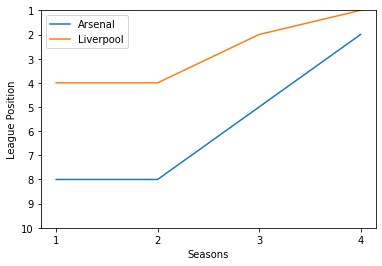

In [22]:
Season = ['1','2','3','4']
plt.plot(Season,'Pos', data= mydata, label="Arsenal")

plt.plot(Season,'Pos', data= mydata2, label="Liverpool")

plt.ylim(10,1)

plt.xlabel('Seasons')
plt.ylabel('League Position')

plt.legend()
plt.show()

Although Klopp managed to guide liverpool to a higher finish than Arteta did for Arsenal in their first three seasons at their respective clubs, there is a similiar shape whereby both clubs had a stagnant position finish in the first two seasons under their new managers before improving to a better league finish in the third season

### 11.2 Comparing goals scored by both
The bar graph below will show the difference between how much goals were scored by each team in the three seasons

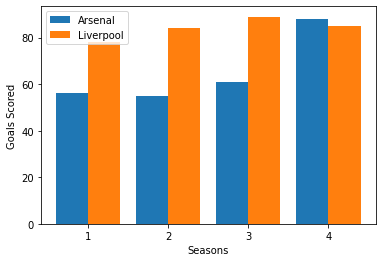

In [23]:
Season = ['1','2','3','4']

x_axis = np.arange(len(Season))

plt.bar(x_axis-0.2, 'GF', 0.4, label="Arsenal", data= mydata)
plt.bar(x_axis+0.2, 'GF', 0.4, label="Liverpool",data= mydata2)

plt.xticks(x_axis, Season)
plt.xlabel('Seasons')
plt.ylabel('Goals Scored')


plt.legend()
plt.show()

It is evident from the bar chart above, that Liverpool has a better firepower than Arsenal. They consistently were able to score more goals than Arsenal in the three seasons. 

### 11.3 Comparing goals Conceded by both
The bar graph below will show the difference between how much goals were scored by each team in the three seasons

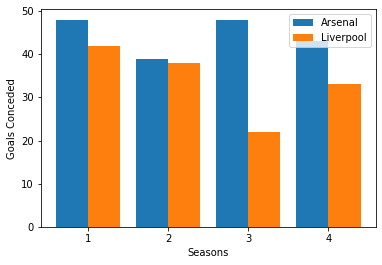

In [24]:
Season = ['1','2','3','4']

x_axis = np.arange(len(Season))

plt.bar(x_axis-0.2, 'GA', 0.4, label="Arsenal", data= mydata)
plt.bar(x_axis+0.2, 'GA', 0.4, label="Liverpool",data= mydata2)

plt.xticks(x_axis, Season)
plt.xlabel('Seasons')
plt.ylabel('Goals Conceded')


plt.legend()
plt.show()

The bar chart shows that Arsenal had always been conceding more goals than Liverpool. However, in the third season, we can see that Liverpool managed to improve their defence judging by drastic decrease in number of goals conceded where Arsenal's number of goals conceded increased in the third season.

### 11.4 Comparing Arteta and Klopp
The pie chart below will show the wins, draw and losses of Arteta and Klopp in their first three seasons

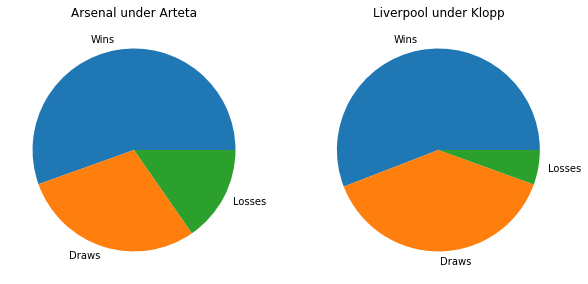

In [25]:
fig, (plt1,plt2) = plt.subplots(1,2,figsize=(10,10))
mylabel = ["Wins","Draws","Losses"]

TotalW = mydata["Pld"].sum()
TotalD = mydata["W"].sum()
TotalL = mydata["L"].sum()
y =np.array([TotalW, TotalD, TotalL])
plt1.pie(y, labels = mylabel)
plt1.set_title("Arsenal under Arteta")

TotalW2 = mydata2["Pld"].sum()
TotalD2 = mydata2["W"].sum()
TotalL2 = mydata2["L"].sum()
z =np.array([TotalW2, TotalD2, TotalL2])
plt2.pie(z, labels = mylabel)
plt2.set_title('Liverpool under Klopp')

plt.show()

From the pie chart above, I can deduce that they have similar win rates. It is a positive sign that Arteta has a large win portion similar to Klopp. 

## 12 Summary
### 12.1 Conclusion
Deducing from the analysis made, I can say that Arteta is doing quite a decent job at rebuilding Arsenal. Areas such as improvement in league positioning trend similiar to Liverpool's Klopp that shows Arteta is improving at Arsenal.  An area where he must improve the team is their defence department should they want to be more successul in the upcoming season. It is safe to say that Arteta is the right person for this job and judging by the upward trend of Arsenal's league position and points accumulation, the team will improve for the upcoming season. Arsenal fans can expect an exciting season ahead. 

### 12.2 Summary of prepared data
#### 12.2.1 Arsenal Dataframe

In [26]:
mydata.columns

Index(['Index', 'Season', 'Division', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'Pts',
       'Pos', 'FA Cup', 'League', 'Community', 'Competition', 'Result',
       'Player(s)', 'Goals'],
      dtype='object')

#### 12.2.2 Liverpool Dataframe

In [27]:
mydata2.columns

Index(['Season', 'Division', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'Pts', 'Pos',
       'FA Cup', 'League Cup', 'Comm. Shield', 'UCL', 'UEL', 'CWC',
       'Super Cup', 'Club World Cup', 'Player(s)', 'Goals'],
      dtype='object')

## 13 References and Resources
### 13.1 References
[1] https://en.wikipedia.org/wiki/Wikipedia:General_disclaimer
### 13.2 Resources
#### Webscraping
- Webscraping and APIs with Llewelyn Fernandes (Coursera)
- Web Scraping a Wikipedia Table into a Dataframe (https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451)
- Scrape_Helper file (Webscraping and APIs with Llewelyn Fernandes)

#### Data cleaning and processing
- Webscraping and APIs with Llewelyn Fernandes

#### Plotting graphs and charts
- Matplotlib Pie Charts (https://www.w3schools.com/python/matplotlib_pie_charts.asp )
- Plotting multiple bar charts using Matplotlib in Python (https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/)
- Graph Plotting in Python | Set 1(https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/)
-Guest lecture with Llewelyn Fernandes - Data Plotting (Coursera)